In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [2]:
card_data = pd.read_csv("creditcard.csv")
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card_data.isnull().values.any()

False

In [4]:
card_data.shape

(284807, 31)

In [5]:
card_data.drop_duplicates(inplace=True)

In [6]:
card_data.shape

(283726, 31)

In [7]:
card_data.Amount.describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
genuine_transactions = len(card_data[card_data.Class == 0])
fraud_transactions = len(card_data[card_data.Class == 1])
total_transactions = genuine_transactions + fraud_transactions

percentage_of_fraud = (fraud_transactions/total_transactions)*100
print("Percentage of fraud transactions: {:.2f}".format(percentage_of_fraud))

Percentage of fraud transactions: 0.17


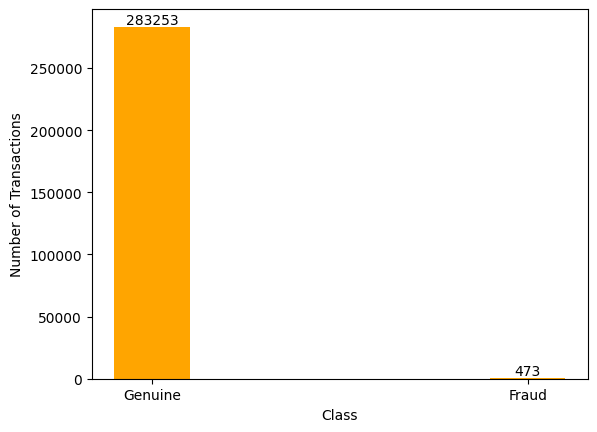

In [9]:
classes = ['Genuine', 'Fraud']
values = [card_data.Class.value_counts()[0], card_data.Class.value_counts()[1]]

fig, ax = plt.subplots()

bar_graph = ax.bar(classes, values, color='orange', width=0.2)
ax.bar_label(bar_graph)
plt.ylabel("Number of Transactions")
plt.xlabel("Class")
plt.show()

In [10]:
card_data.drop(["Time"], inplace=True, axis=1)

In [11]:
x_data = card_data.drop(["Class"], axis=1)
y_data = card_data["Class"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)

(198608, 29)
(85118, 29)


In [12]:
bnb = BernoulliNB()

b_y_predict = bnb.fit(x_train, y_train).predict(x_test)

b_accuracy = accuracy_score(y_true=y_test, y_pred=b_y_predict)
print("Obtained Bernoulli Accuracy score: {0}%".format(b_accuracy*100))

Obtained Bernoulli Accuracy score: 99.92363542376465%


In [13]:
x_test = pd.DataFrame(x_test)
result = x_test.copy()
result['Prediction'] = b_y_predict
result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Prediction
104697,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,-0.349941,...,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42,0
134356,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,4.728060,...,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82,0
42637,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,-0.172838,...,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,46.08,0
882,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,-0.174777,...,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,3.58,0
263275,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,-0.115561,...,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,2.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67295,1.147131,0.534818,-0.592102,0.655654,0.573169,-0.183201,0.175724,0.086988,-0.489279,-0.643127,...,-0.041990,-0.012247,-0.039780,-0.388966,0.405204,0.409539,0.001031,0.026682,0.76,0
106097,-0.616469,0.859860,2.107379,1.392730,0.173747,0.254968,0.436978,0.213279,-0.379364,-0.195089,...,0.154675,0.488038,-0.241472,-0.123409,-0.064337,-0.067898,0.120835,0.143017,19.95,0
126023,1.406817,-0.977043,0.546359,-1.348784,-1.267660,-0.258014,-0.998721,-0.042832,-2.005060,1.326065,...,-0.125951,0.138562,0.124173,0.095602,0.223988,-0.170268,0.068920,0.019576,15.00,0
228348,1.870134,-0.162397,-1.923892,0.407994,0.264927,-0.914765,0.213651,-0.186013,0.442971,-0.329617,...,0.273520,0.719726,-0.130908,-0.473154,0.199530,-0.101929,-0.023212,-0.032363,85.25,0


In [14]:
result.to_csv("final.csv", index=False)

In [15]:
result[result["Prediction"] == 1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Prediction
59539,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,-2.495619,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
243749,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,-2.497561,...,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00,1
17480,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,...,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1
28976,-1.236842,1.949390,-1.139733,1.142948,-1.189765,-1.097560,-2.130852,0.701933,-1.488241,-3.596467,...,0.234634,-0.887139,-0.140437,-0.467764,0.041665,0.171172,0.865273,0.374717,2.69,1
143731,-2.207631,3.259076,-5.436365,3.684737,-3.066401,-0.671323,-3.696178,1.822272,-3.049653,-6.353887,...,0.920899,0.037675,0.026754,-0.791489,0.176493,-0.136312,1.087585,0.373834,240.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150644,-3.821939,5.667247,-9.244963,8.246147,-4.368286,-3.450735,-8.427378,2.305609,-5.338079,-12.011161,...,1.990520,0.083353,-0.062264,0.390188,0.329884,0.098017,1.869570,1.000850,75.86,1
77099,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,-3.555835,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,5.00,1
8842,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,-4.594952,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1
235644,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,-2.530507,-5.175660,...,1.096405,1.064222,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,122.68,1


In [16]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(bnb, open(filename, 'wb'))

In [17]:
x_test_new = card_data[400:500].drop(["Class"], axis=1)
y_test_new = card_data[400:500]['Class']

In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_new, y_test_new)
print(result*100)

98.0


In [19]:
modelpre = loaded_model.predict(x_test_new)

In [20]:
x_test_new = pd.DataFrame(x_test_new)
model_result = x_test_new.copy()
model_result['Prediction'] = modelpre
model_result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Prediction
407,-1.097477,1.246236,0.464855,-0.178196,0.249499,-0.725058,1.197760,-0.358585,-0.153112,0.383807,...,-0.050148,0.114628,-0.188974,-0.066727,-0.160964,0.275263,0.117647,0.272015,73.00,0
408,-0.745116,0.446440,1.714154,-0.146626,-0.244287,-0.963058,0.566537,-0.044998,0.274475,-0.686536,...,-0.149227,-0.440704,0.088860,0.708177,-0.570540,0.036992,-0.041732,0.182178,33.33,0
409,1.168460,0.284169,0.427985,1.382027,-0.057586,-0.157170,0.132989,-0.070709,0.141838,-0.152932,...,-0.091412,0.025132,-0.072434,0.121771,0.697131,-0.315949,0.046610,0.017891,6.86,0
410,1.171488,0.111367,0.358994,0.210844,-0.560816,-1.408542,0.354584,-0.353311,-0.118270,-0.226567,...,-0.454727,-1.451831,0.265729,0.715640,-0.033477,0.285188,-0.080931,0.024925,54.75,0
411,-1.148038,0.367626,2.769717,-0.356562,-0.268456,0.323423,-0.108718,0.452755,0.166990,-0.752053,...,0.063334,0.168210,-0.194521,0.228655,0.107744,0.222331,-0.109160,0.089767,6.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,-0.602646,...,-0.098744,-0.015598,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,0
503,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,-0.260028,...,-0.296736,-0.894374,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,0
504,1.354445,-0.815297,0.836498,-0.617140,-1.304124,-0.025274,-1.147177,0.162996,-0.258341,0.660341,...,0.292038,0.941357,-0.192851,0.049422,0.597416,0.002149,0.035182,0.003682,4.79,0
505,1.149246,0.018358,0.430440,0.537503,-0.430754,-0.394699,-0.151398,0.135031,-0.004959,0.113950,...,-0.124932,-0.449760,0.135781,0.185130,0.129062,0.177780,-0.034565,0.001487,10.29,0
